# Image Classification
In this exercise, you will be classifying images about clothes. The data set you will be using is called `fashion-small.csv`.

### Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.


In [1]:
# For data management
import pandas as pd
import numpy as np

# Import classifiers
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# metrics contain our plot_confustion_matrix and classification_report
from sklearn import metrics

# Helper fuction to splitting data
from sklearn.model_selection import train_test_split

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline 



# 1. Inspect and explore our data
1. Load the `fashion-small.csv` data into a pandas dataframe. 
2. Inspect / remove null values. 
3. Inspect / remove duplicate rows. 
4. Print out the number examples in each class aka the class balances. 
5. Visualize at least one image.

In [2]:
# 1. Load data into a pandas dataframe. 
df = pd.read_csv('data/digits-small.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Inspect for null values

In [3]:
# 2. Inspect / remove null values. 
df.isnull().sum()
df.isnull().sum().sum()

0

### Check for duplicates

In [4]:
# 3. Inspect / remove duplicate rows. 
df.duplicated().sum()

0

### Lets look at our class balances

In [5]:
# 4. Print out the number examples in each class aka the class balances. 
df.label.value_counts(), df.label.value_counts(normalize=True)

(1    440
 0    439
 7    437
 9    433
 2    425
 3    415
 6    410
 5    408
 4    398
 8    395
 Name: label, dtype: int64,
 1    0.104762
 0    0.104524
 7    0.104048
 9    0.103095
 2    0.101190
 3    0.098810
 6    0.097619
 5    0.097143
 4    0.094762
 8    0.094048
 Name: label, dtype: float64)

# Visualize one image

## First, we need to create a list that is just our pixel columns

In [8]:
# Grabs all of the columns 
# This grabs all of the columns 
pixel_cols = df.columns
# Convert the all columns object into a regular list
# This is currently a pandas index object
print(type(pixel_cols))

# Convert the pandas index object into a regular list
pixel_cols = list(pixel_cols)

# Sanity check that it is now just a list.

print(type(pixel_cols))

#removing the label column
pixel_cols.remove('label')

<class 'pandas.core.indexes.base.Index'>
<class 'list'>


## Extract one row and reshape it to its original 28x28 shape and plot the reshaped image.

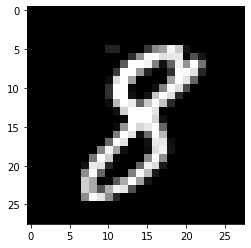

In [12]:
# Select just the pixel columns and convert them to a numpy array by using .values. 
imgs = df[pixel_cols].values

# Select just one image from all the images
img = imgs[999]

# Reshape the image to be a 28x28 matrix (original format of image)
img = img.reshape(28,28)

# Plot reshaped image
plt.imshow(img, cmap='gray')




___
# 2. Select and engineer our features.
1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 
2. Define our `X` and `y` data. 
2. Train-test-split our `X` and `y` data

### 1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 

In [13]:
# DOING THIS AGAIN JUST FOR PRACTICE 

# Grabs all of the columns 
selected_features = df.columns


# Convert the all columns object into a regular list
selected_features = list(selected_features)

# Sanity check that it is now just a list.
print(type(selected_features))

# Remove the label column from the list
# This happnes 'in place'
selected_features.remove('label')

<class 'list'>


### 2. Define our `X` and `y`

In [14]:
# 2. Define our `X` and `y` data. 

X = df[selected_features]

y = df['label']

### 3. Train-test-split our `X` and `y` data

In [15]:
# 3. Train-test-split our `X` and `y` data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)

____
# 3. Build and train our model
1. Initalize an empty Support Vector Classifier model.
2. Fit that model with our training data. 

In [16]:
# 1. Initalize an empty Support Vector Classifier model.
from sklearn import svm

# Initalize our Support Vector Classifier
model = svm.SVC()

In [17]:
# 2. Fit that model with our training data. 
model.fit(X_train, y_train)

SVC()

___
# 4. Evaluate our model
1. Get a baseline accuracy score.
2. Make new predictions using our test data. 
3. Print the classification report. 
4. Plot the confusion matrix of our predicted results. 

### 1. Get a baseline accuracy score.

In [18]:
### 1. Get and print a baseline accuracy score.
accuracy = model.score(X_test, y_test)
print("Accuracy %f" % accuracy)

Accuracy 0.937143


### 2. Make new predictions using our test data. 

In [19]:
### 2. Make new predictions using our test data. 
y_pred = model.predict(X_test)

### 3. Print the classification report. 
Use the sklearn helper fuction for this. 

In [20]:
### 3. Print the classification report. 
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.99      0.96       102
           1       0.97      0.98      0.98       109
           2       0.94      0.90      0.92       115
           3       0.94      0.94      0.94       100
           4       0.92      0.93      0.93       114
           5       0.87      0.94      0.91        88
           6       0.95      0.97      0.96       118
           7       0.98      0.94      0.96       108
           8       0.95      0.81      0.88        91
           9       0.91      0.94      0.93       105

    accuracy                           0.94      1050
   macro avg       0.94      0.94      0.94      1050
weighted avg       0.94      0.94      0.94      1050



### 4. Plot the confusion matrix of our predicted results. 

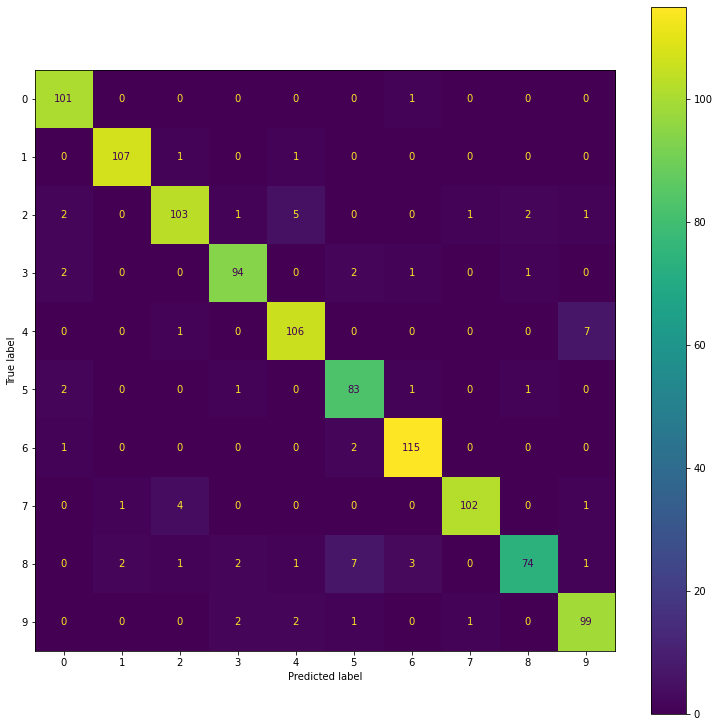

In [21]:
### 4. Plot the confusion matrix of our predicted results.
fig, ax = plt.subplots(figsize=(13,13))
metrics.plot_confusion_matrix(estimator=model, 
                              X=X_test, 
                              y_true=y_test, 
                              ax=ax)

### Looking at the confusion matrix, which two clothing items were mis-classfied with eachother the most?

In [22]:
print('The classifier mistaked 4 as 9 and 8 as 5 the most.')

The classifier mistaked 4 as 9 and 8 as 5 the most.


___
### Build a function thats input is an unfitted model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 

In [23]:
### Build a function thats input is an empty model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 
def build_and_eval_model(model, X, y, random_state=23):
    print("Running report for model", model)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=random_state)    
    
    # Fit our model.
    model.fit(X_train, y_train)
    
    # Get the accuracy
    accuracy = model.score(X_test, y_test)
    print("\n\nAccuracy %f" % accuracy)
    
    
    # Make new predictions
    y_pred = model.predict(X_test)
    
    
    # Print the classification report. 
    print(metrics.classification_report(y_test, y_pred))
    
        
    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(13,13))
    
    metrics.plot_confusion_matrix(estimator=model, 
                                  X=X_test, 
                                  y_true=y_test, 
                                  ax=ax)

    # Return the fitted model. 
    return model

## Run LogisticRegression, RandomForest, and Multinomial Naive Bayes through the function you just built and compare the results. 
1. Which classifier did the best, and which classifier did the worst. 

Running report for model LogisticRegression()


Accuracy 0.871429
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       115
           1       0.95      0.95      0.95       123
           2       0.82      0.79      0.80       103
           3       0.83      0.77      0.80       100
           4       0.88      0.90      0.89        98
           5       0.80      0.84      0.82       102
           6       0.94      0.90      0.92       114
           7       0.91      0.92      0.92       103
           8       0.79      0.80      0.80        85
           9       0.86      0.84      0.85       107

    accuracy                           0.87      1050
   macro avg       0.87      0.87      0.87      1050
weighted avg       0.87      0.87      0.87      1050



/Users/zogadukagmail.com/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

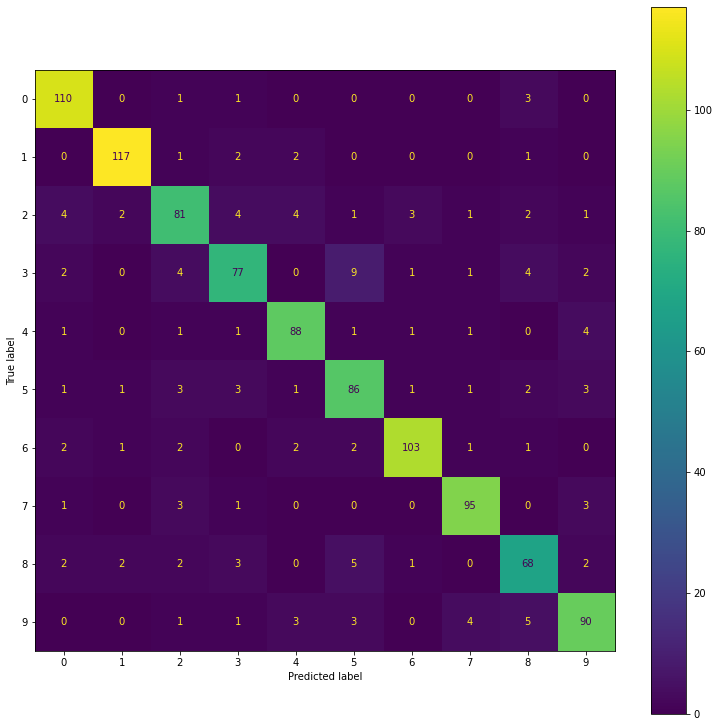

In [24]:
# LogisticRegression
lr = LogisticRegression()
build_and_eval_model(lr, X, y)

Running report for model RandomForestClassifier()


Accuracy 0.914286
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       115
           1       0.97      0.97      0.97       123
           2       0.86      0.88      0.87       103
           3       0.89      0.85      0.87       100
           4       0.93      0.89      0.91        98
           5       0.93      0.87      0.90       102
           6       0.96      0.96      0.96       114
           7       0.94      0.88      0.91       103
           8       0.90      0.88      0.89        85
           9       0.83      0.94      0.89       107

    accuracy                           0.91      1050
   macro avg       0.91      0.91      0.91      1050
weighted avg       0.92      0.91      0.91      1050



RandomForestClassifier()

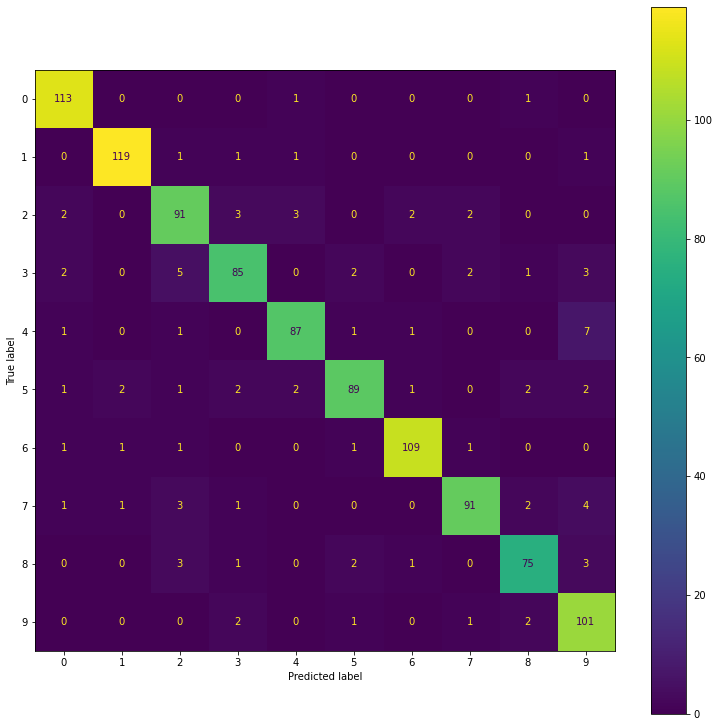

In [25]:
# RandomForest
rf = RandomForestClassifier()

build_and_eval_model(rf, X, y)

Running report for model MultinomialNB()


Accuracy 0.823810
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       115
           1       0.93      0.91      0.92       123
           2       0.86      0.83      0.84       103
           3       0.86      0.83      0.85       100
           4       0.72      0.66      0.69        98
           5       0.90      0.68      0.77       102
           6       0.85      0.91      0.88       114
           7       0.94      0.85      0.89       103
           8       0.62      0.80      0.70        85
           9       0.70      0.81      0.75       107

    accuracy                           0.82      1050
   macro avg       0.83      0.82      0.82      1050
weighted avg       0.83      0.82      0.82      1050



MultinomialNB()

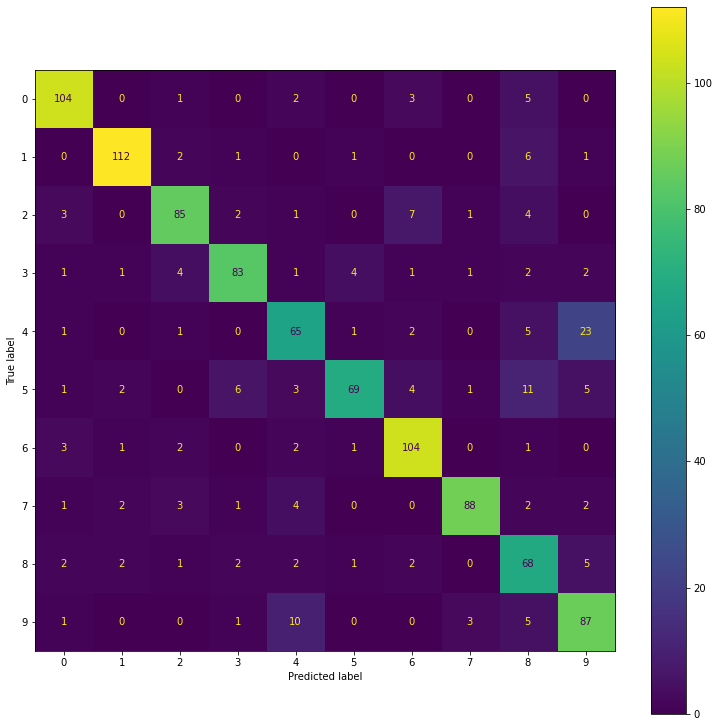

In [26]:
# MultinomialNB
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
build_and_eval_model(mnb, X, y)

In [27]:
print('Random Forest model did the best and MultinomialNB model did the worst.')

Random Forest model did the best and MultinomialNB model did the worst.
